In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy.io import fits

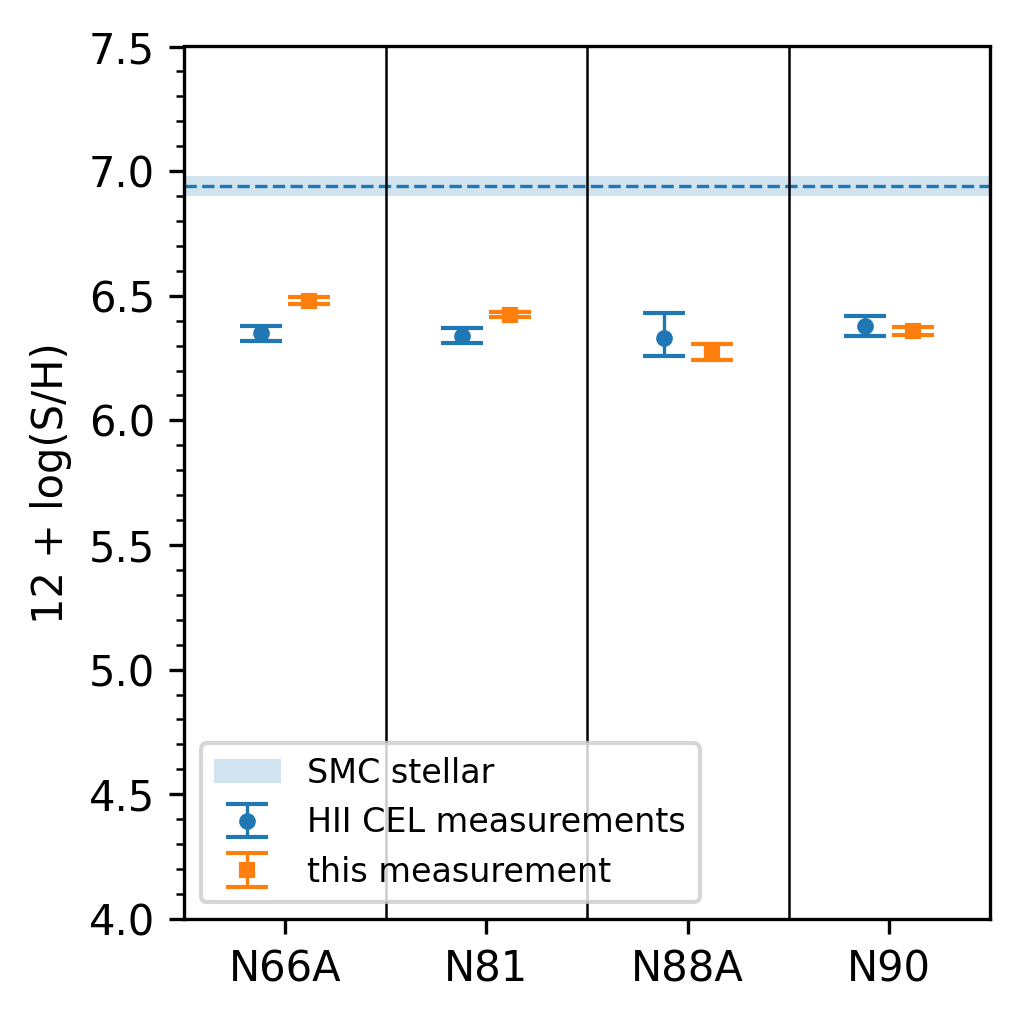

In [7]:
font = {'family' : 'serif',
         'size'   : 12,
         'serif':  'cmr10'
         }

df = pd.DataFrame({
    "Object": ["N66A", "N81", "N88A", "N90"],
    "S": [6.35, 6.34, 6.33, 6.38],
    "sigma_low": [0.03, 0.03, 0.07, 0.04],
    "sigma_high": [0.03, 0.03, 0.10, 0.04],
})

df_sight_lines = pd.DataFrame({
    "HII": ["N66A", "N81", "N88A", "N90"],
    "S":   [6.480, 6.423, 6.275, 6.358],
    "sigma_S": [0.013, 0.010, 0.031, 0.017]
})

x = np.arange(len(df))
offset = 0.12

fig, ax = plt.subplots(figsize = (3.5, 3.5), dpi = 300)

ax.errorbar(x - offset, df["S"], yerr = [df["sigma_low"], df["sigma_high"]], fmt = "o", markersize = 3, capsize = 5, elinewidth = 0.8, label = r"HII CEL measurements")
ax.errorbar(x + offset, df_sight_lines["S"], yerr = df_sight_lines["sigma_S"], fmt = "s", markersize = 3, capsize = 5, elinewidth = 0.8, label = r"this measurement",)

ax.fill_between([-1, len(df)], 6.94 - 0.04, 6.94 + 0.04, alpha = 0.2, label = "SMC stellar")
ax.axhline(6.94, linestyle = "--", linewidth = 0.8)

ax.axvline(0.5, linestyle = '-', linewidth = 0.6, color = 'black')
ax.axvline(1.5, linestyle = '-', linewidth = 0.6, color = 'black')
ax.axvline(2.5, linestyle = '-', linewidth = 0.6, color = 'black')

ax.set_xticks(x)
ax.set_xticklabels(df["Object"])
ax.set_ylabel(r"12 + log(S/H)")
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(4, 7.5)
ax.minorticks_on()
ax.xaxis.set_tick_params(which = 'minor', bottom = False)
ax.legend(fontsize = 8)

fig.tight_layout()
plt.savefig('Sulfur.png', dpi = 300)

plt.show()

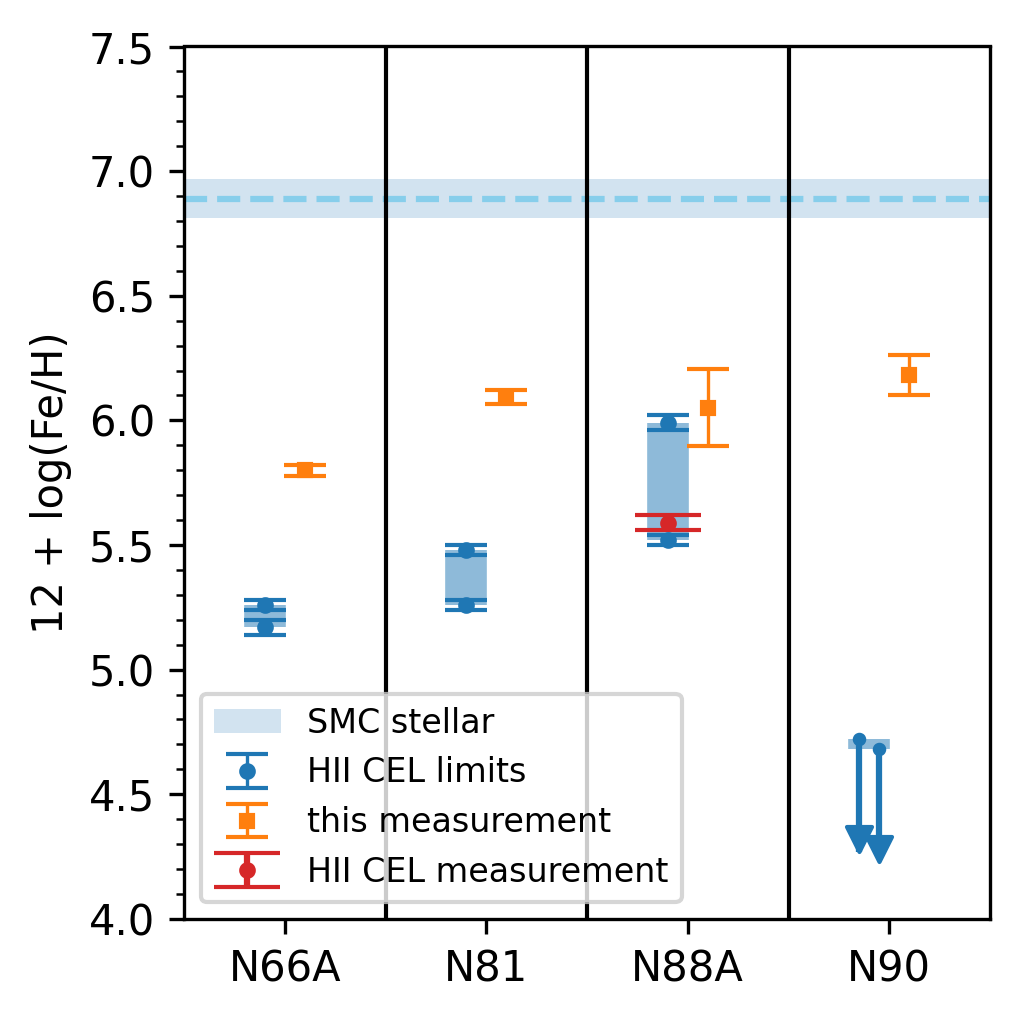

In [8]:
df = pd.DataFrame({
    "Object": ["N66A", "N81", "N88A", "N90"],
    "Fe_b": [5.17, 5.26, 5.52, 4.72],
    "sigma_Fe_b": [0.03, 0.02, 0.02, np.nan],
    "Fe_c": [5.26, 5.48, 5.99, 4.68],
    "sigma_Fe_c": [0.02, 0.02, 0.03, np.nan],
    "Fe":    [np.nan, np.nan, 5.59, np.nan],
    "sigma_Fe": [np.nan, np.nan, 0.03, np.nan],
    "upper_limit": [False, False, False, True] # upper limits for N90
})

df_sight_lines = pd.DataFrame({
    "HII": ["N66A", "N81", "N88A", "N90"],
    "Fe":   [5.799, 6.093, 6.051, 6.181],
    "sigma_Fe": [0.022, 0.029, 0.155, 0.080]
})

# Prep figure
fig, ax = plt.subplots(figsize = (3.5, 3.5), dpi = 300)
x = np.arange(4)
x_left_offset = x - 0.1
x_right_offset = x + 0.1

for i, row in df.iterrows():
    if i == 0:
        ax.errorbar(x_left_offset[i], row['Fe_b'], yerr = row['sigma_Fe_b'], fmt = "o", markersize = 3, capsize = 5, elinewidth = 0.8, color = 'C0', label = r"HII CEL limits")
        ax.errorbar(x_left_offset[i], row['Fe_c'], yerr = row['sigma_Fe_c'], fmt = "o", markersize = 3, capsize = 5, elinewidth = 0.8, color = 'C0')
    elif row['upper_limit'] == False:
        ax.errorbar(x_left_offset[i], row['Fe_b'], yerr = row['sigma_Fe_b'], fmt = "o", markersize = 3, capsize = 5, elinewidth = 0.8, color = 'C0')
        ax.errorbar(x_left_offset[i], row['Fe_c'], yerr = row['sigma_Fe_c'], fmt = "o", markersize = 3, capsize = 5, elinewidth = 0.8, color = 'C0')
    else:
        ax.scatter(x_left_offset[i] - 0.05, row['Fe_b'], marker = 'o', s = 5, color = 'C0')
        ax.vlines(x_left_offset[i] - 0.05, row['Fe_b'], row['Fe_b'] - 0.45, color = 'C0')
        ax.scatter(x_left_offset[i] - 0.05, row['Fe_b'] - 0.4, marker = 'v', color = 'C0')

        ax.scatter(x_left_offset[i] + 0.05, row['Fe_c'], marker = 'o', s = 5, color = 'C0')
        ax.vlines(x_left_offset[i] + 0.05, row['Fe_c'], row['Fe_b'] - 0.45, color = 'C0')
        ax.scatter(x_left_offset[i] + 0.05, row['Fe_c'] - 0.4, marker = 'v', color = 'C0')

        ax.vlines(x_left_offset[i], row['Fe_b'], row['Fe_c'], linewidth = 10, color = 'C0', alpha = 0.5)

for i, row in df.iterrows():
    if not row['upper_limit']:
        ax.vlines(x_left_offset[i], row['Fe_b'], row['Fe_c'], linewidth = 10, color = 'C0', alpha = 0.5)

ax.errorbar(x_right_offset, df_sight_lines["Fe"], yerr = df_sight_lines["sigma_Fe"], fmt = "s", markersize = 3, capsize = 5, elinewidth = 0.8, color = 'C1', label = 'this measurement')
ax.errorbar(x_left_offset[2], np.array([5.59]), yerr = np.array([0.03]), fmt = 'o', markersize = 3, capsize = 8, color = 'C3', label = 'HII CEL measurement')

ax.fill_between([-1, 4], 6.89 - 0.08, 6.89 + 0.08, alpha = 0.2, label = 'SMC stellar')
ax.axhline(6.89, color = 'skyblue', linestyle = '--')

ax.axvline(0.5, linestyle = '-', linewidth = 1, color = 'black')
ax.axvline(1.5, linestyle = '-', linewidth = 1, color = 'black')
ax.axvline(2.5, linestyle = '-', linewidth = 1, color = 'black')

ax.set_xticks(x)
ax.set_xticklabels(df["Object"])
ax.set_ylabel(r"12 + log(Fe/H)")
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(4, 7.5)
ax.minorticks_on()
ax.xaxis.set_tick_params(which = 'minor', bottom = False)
ax.legend(fontsize = 8)

fig.tight_layout()
plt.savefig('Iron.png', dpi = 300)

plt.show()

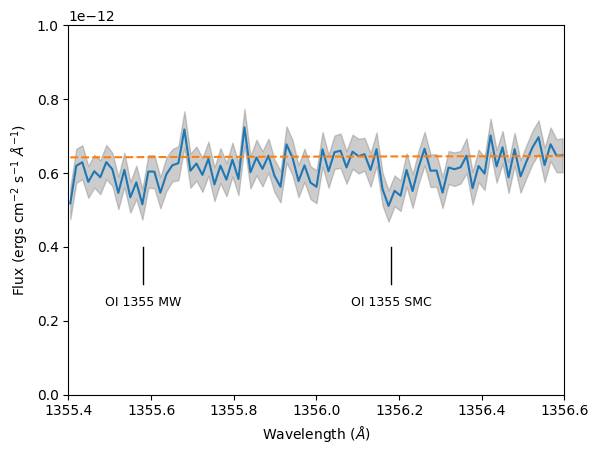

In [9]:
hdul = fits.open("/Users/billyli/Documents/float-for-morrow/SMC/AV15/E140M/E140M10/o4wr14010_continuumfit.fits")

wavelength = hdul[2].data
flux = hdul[0].data
continuum = hdul[3].data
error = hdul[1].data

mask = (wavelength > 1355.4) & (wavelength < 1356.6)

plt.plot(wavelength[mask], flux[mask])
plt.plot(wavelength[mask], continuum[mask], linestyle = '--')
plt.fill_between(wavelength[mask], flux[mask] - error[mask], flux[mask] + error[mask], color = 'gray', alpha = 0.4)


mw_line = 1355.58
smc_line = 1356.18

plt.plot([mw_line, mw_line], [0.3e-12, 0.4e-12], color = 'black', linewidth = 1)
plt.plot([smc_line, smc_line], [0.3e-12, 0.4e-12], color = 'black', linewidth = 1)

plt.text(mw_line, 0.25e-12, 'OI 1355 MW', va = 'center', ha = 'center', fontsize = 9)
plt.text(smc_line, 0.25e-12, 'OI 1355 SMC', va = 'center', ha = 'center', fontsize = 9)


plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r"Flux (ergs cm$^{-2}$ s$^{-1}$ $\AA^{-1}$)")
plt.xlim(1355.4, 1356.6)
plt.ylim(0, 1e-12)
plt.show()

/var/folders/7n/v6gcxcpj68q6nnv2znnc85xc0000gn/T/ipykernel_1657/3148107441.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lsf_df = pd.read_csv(lsf_file, delim_whitespace = True, comment = 'S', header = 1,names = ["rel_pixel", "0.1x0.03", "0.2x0.06", "0.2x0.2", "6x0.2"])
/var/folders/7n/v6gcxcpj68q6nnv2znnc85xc0000gn/T/ipykernel_1657/3148107441.py:69: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lsf_df = pd.read_csv(lsf_file, delim_whitespace = True, comment = 'S', header = 1,names = ["rel_pixel", "0.1x0.03", "0.2x0.06", "0.2x0.2", "6x0.2"])
/var/folders/7n/v6gcxcpj68q6nnv2znnc85xc0000gn/T/ipykernel_1657/3148107441.py:108: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lsf_df = pd.read_csv(ls

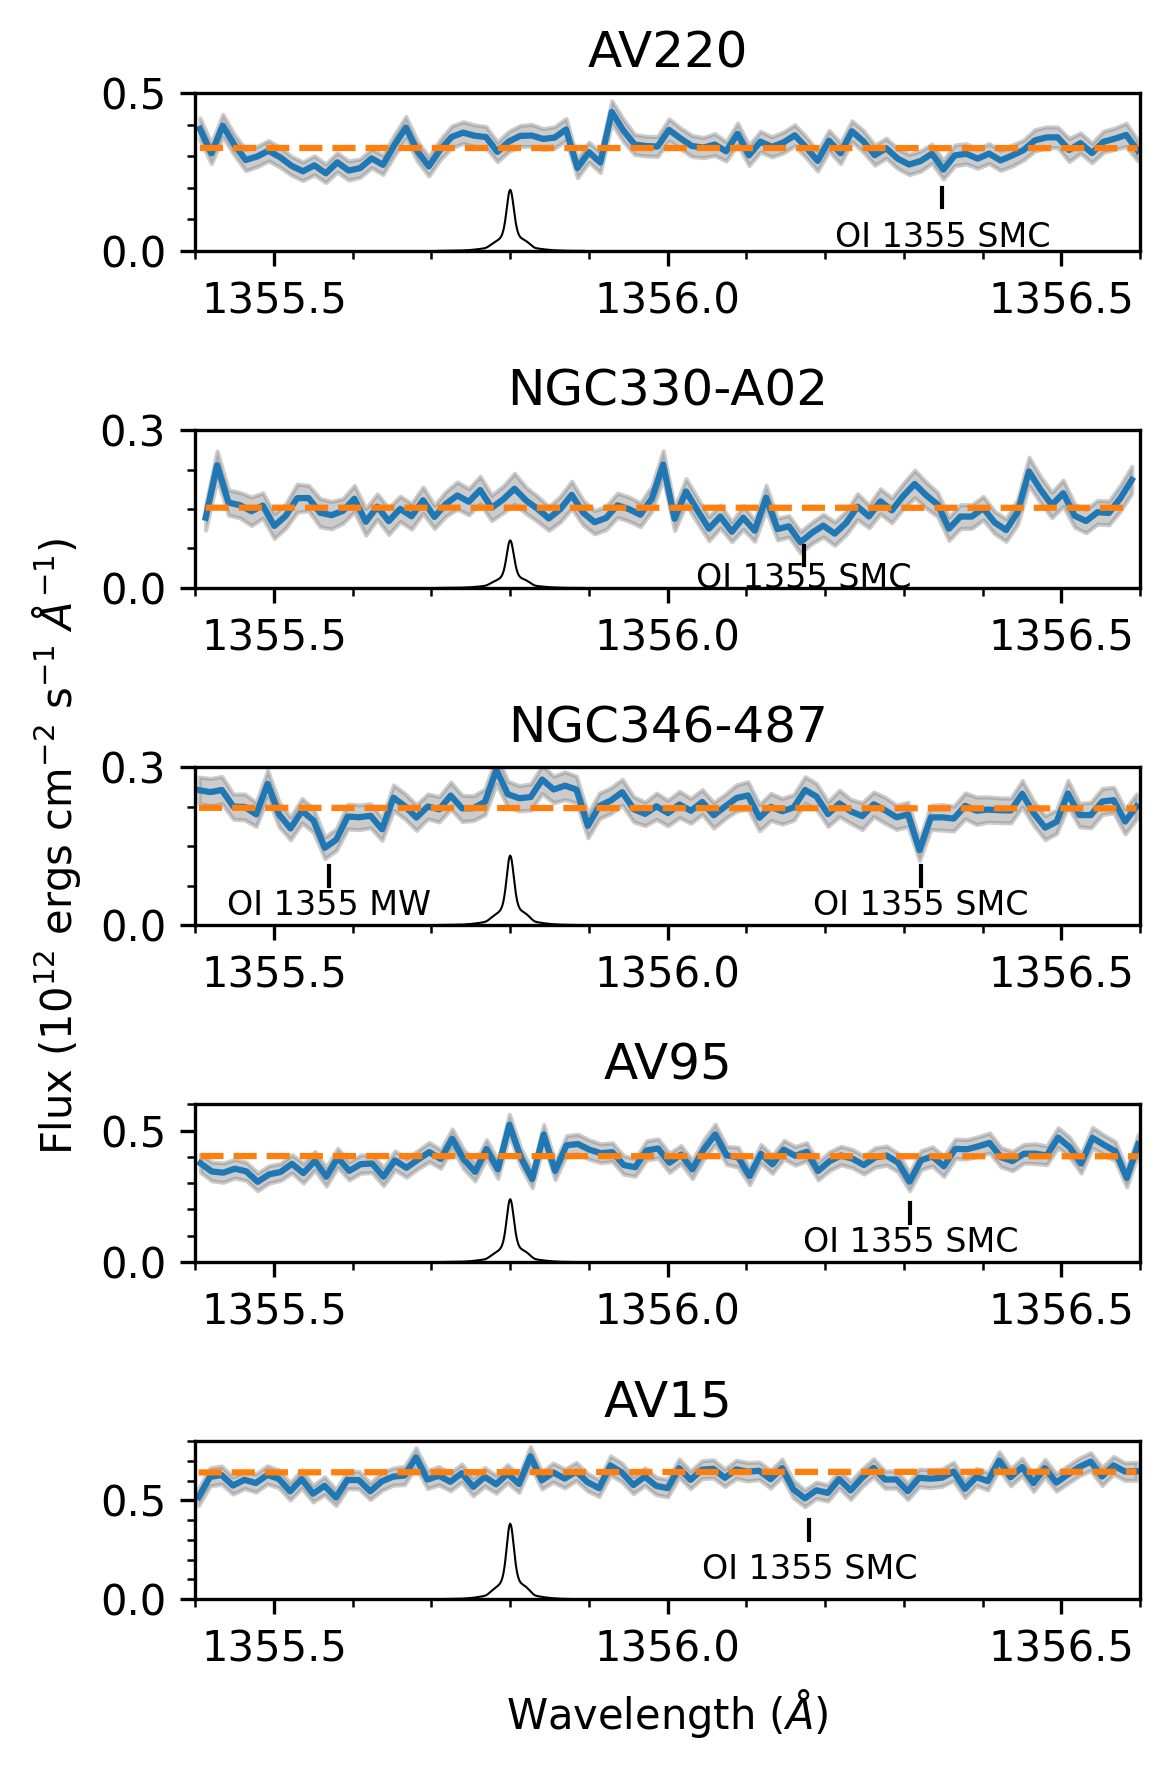

In [10]:
fig, ax = plt.subplots(5, 1, figsize = (4, 6), dpi = 300)

hdul = fits.open("/Users/billyli/Documents/float-for-morrow/SMC/AV15/E140M/E140M10/o4wr14010_continuumfit.fits")

wavelength = hdul[2].data
flux = hdul[0].data * 1e12
continuum = hdul[3].data * 1e12
error = hdul[1].data * 1e12

mask = (wavelength > 1355.4) & (wavelength < 1356.6)

ax[4].plot(wavelength[mask], flux[mask])
ax[4].plot(wavelength[mask], continuum[mask], linestyle = '--')
ax[4].fill_between(wavelength[mask], flux[mask] - error[mask], flux[mask] + error[mask], color = 'gray', alpha = 0.4)

mw_line = 1355.58
smc_line = 1356.18

ax[4].plot([smc_line, smc_line], [0.3, 0.4], color = 'black', linewidth = 1)
ax[4].text(smc_line, 0.15, 'OI 1355 SMC', va = 'center', ha = 'center', fontsize = 8)

plt.xlabel(r'Wavelength ($\AA$)')
ax[2].set_ylabel(r"Flux ($10^{12}$ ergs cm$^{-2}$ s$^{-1}$ $\AA^{-1}$)")
ax[4].set_xlim(1355.4, 1356.6)
ax[4].set_ylim(0, 0.8)
ax[4].set_xticks([1355.5, 1356, 1356.5])
ax[4].minorticks_on()

lsf_file = "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/linetools/data/lsf/STIS/stis_LSF_E140M_1500.txt"
lsf_df = pd.read_csv(lsf_file, delim_whitespace = True, comment = 'S', header = 1,names = ["rel_pixel", "0.1x0.03", "0.2x0.06", "0.2x0.2", "6x0.2"])
x_lsf = lsf_df["rel_pixel"].values
y_lsf = lsf_df["0.2x0.2"].values

pixel_scale_angstrom = 0.00997
wavelength_offset = x_lsf * pixel_scale_angstrom
lsf_wavelength = 1355.8 + wavelength_offset
lsf_flux = y_lsf * np.mean(continuum[mask])

ax[4].plot(lsf_wavelength, lsf_flux, color = 'black', linewidth = 0.5)

hdul = fits.open("/Users/billyli/Documents/float-for-morrow/SMC/AV220/E140M/E140M10/o4wr20010_continuumfit.fits")

wavelength = hdul[2].data
flux = hdul[0].data * 1e12
continuum = hdul[3].data * 1e12
error = hdul[1].data * 1e12

mask = (wavelength > 1355.4) & (wavelength < 1356.6)

ax[0].plot(wavelength[mask], flux[mask])
ax[0].plot(wavelength[mask], continuum[mask], linestyle = '--')
ax[0].fill_between(wavelength[mask], flux[mask] - error[mask], flux[mask] + error[mask], color = 'gray', alpha = 0.4)

mw_line = 1355.58
smc_line = 1355.59 * 1.00056

ax[0].plot([smc_line, smc_line], [0.3 / 8 * 5 - 0.05, 0.4 / 8 * 5 - 0.05], color = 'black', linewidth = 1)
ax[0].text(smc_line, 0.15 / 8 * 5 - 0.05, 'OI 1355 SMC', va = 'center', ha = 'center', fontsize = 8)


plt.xlabel(r'Wavelength ($\AA$)')
ax[0].set_xlim(1355.4, 1356.6)
ax[0].set_ylim(0, 0.5)
ax[0].set_xticks([1355.5, 1356, 1356.5])
ax[0].set_yticks([0.0, 0.5])
ax[0].minorticks_on()

lsf_file = "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/linetools/data/lsf/STIS/stis_LSF_E140M_1500.txt"
lsf_df = pd.read_csv(lsf_file, delim_whitespace = True, comment = 'S', header = 1,names = ["rel_pixel", "0.1x0.03", "0.2x0.06", "0.2x0.2", "6x0.2"])
x_lsf = lsf_df["rel_pixel"].values
y_lsf = lsf_df["0.2x0.2"].values

pixel_scale_angstrom = 0.00997
wavelength_offset = x_lsf * pixel_scale_angstrom
lsf_wavelength = 1355.8 + wavelength_offset
lsf_flux = y_lsf * np.mean(continuum[mask])

ax[0].plot(lsf_wavelength, lsf_flux, color = 'black', linewidth = 0.5)

hdul = fits.open("/Users/billyli/Documents/float-for-morrow/SMC/NGC330-A02/E140M/E140M10/o6df23020_continuumfit.fits")

wavelength = hdul[2].data
flux = hdul[0].data * 1e12
continuum = hdul[3].data * 1e12
error = hdul[1].data * 1e12

mask = (wavelength > 1355.4) & (wavelength < 1356.6)

ax[1].plot(wavelength[mask], flux[mask])
ax[1].plot(wavelength[mask], continuum[mask], linestyle = '--')
ax[1].fill_between(wavelength[mask], flux[mask] - error[mask], flux[mask] + error[mask], color = 'gray', alpha = 0.4)

mw_line = 1355.58
smc_line = 1355.59 * 1.00043

ax[1].plot([smc_line, smc_line], [0.115 / 8 * 3, 0.215 / 8 * 3], color = 'black', linewidth = 1)
ax[1].text(smc_line, 0.05 / 8 * 3, 'OI 1355 SMC', va = 'center', ha = 'center', fontsize = 8)


plt.xlabel(r'Wavelength ($\AA$)')
ax[1].set_xlim(1355.4, 1356.6)
ax[1].set_ylim(0, 0.3)
ax[1].set_xticks([1355.5, 1356, 1356.5])
ax[1].set_yticks([0.0, 0.3])
ax[1].minorticks_on()

lsf_file = "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/linetools/data/lsf/STIS/stis_LSF_E140M_1500.txt"
lsf_df = pd.read_csv(lsf_file, delim_whitespace = True, comment = 'S', header = 1,names = ["rel_pixel", "0.1x0.03", "0.2x0.06", "0.2x0.2", "6x0.2"])
x_lsf = lsf_df["rel_pixel"].values
y_lsf = lsf_df["0.2x0.2"].values

pixel_scale_angstrom = 0.00997
wavelength_offset = x_lsf * pixel_scale_angstrom
lsf_wavelength = 1355.8 + wavelength_offset
lsf_flux = y_lsf * np.mean(continuum[mask])

ax[1].plot(lsf_wavelength, lsf_flux, color = 'black', linewidth = 0.5)

hdul = fits.open("/Users/billyli/Documents/float-for-morrow/SMC/NGC346-487/E140M/E140M20/o4wr23010_continuumfit.fits")

wavelength = hdul[2].data
flux = hdul[0].data * 1e12
continuum = hdul[3].data * 1e12
error = hdul[1].data * 1e12

mask = (wavelength > 1355.4) & (wavelength < 1356.6)

ax[2].plot(wavelength[mask], flux[mask])
ax[2].plot(wavelength[mask], continuum[mask], linestyle = '--')
ax[2].fill_between(wavelength[mask], flux[mask] - error[mask], flux[mask] + error[mask], color = 'gray', alpha = 0.4)

mw_line = 1355.57
smc_line = 1355.59 * 1.00054

ax[2].plot([smc_line, smc_line], [0.2 / 8 * 3, 0.3 / 8 * 3], color = 'black', linewidth = 1)
ax[2].text(smc_line, 0.1 / 8 * 3, 'OI 1355 SMC', va = 'center', ha = 'center', fontsize = 8)
ax[2].plot([mw_line, mw_line], [0.2 / 8 * 3, 0.3 / 8 * 3], color = 'black', linewidth = 1)
ax[2].text(mw_line, 0.1 / 8 * 3, 'OI 1355 MW', va = 'center', ha = 'center', fontsize = 8)


plt.xlabel(r'Wavelength ($\AA$)')
ax[2].set_xlim(1355.4, 1356.6)
ax[2].set_ylim(0, 0.3)
ax[2].set_xticks([1355.5, 1356, 1356.5])
ax[2].set_yticks([0.0, 0.3])
ax[2].minorticks_on()

lsf_file = "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/linetools/data/lsf/STIS/stis_LSF_E140M_1500.txt"
lsf_df = pd.read_csv(lsf_file, delim_whitespace = True, comment = 'S', header = 1,names = ["rel_pixel", "0.1x0.03", "0.2x0.06", "0.2x0.2", "6x0.2"])
x_lsf = lsf_df["rel_pixel"].values
y_lsf = lsf_df["0.2x0.2"].values

pixel_scale_angstrom = 0.00997
wavelength_offset = x_lsf * pixel_scale_angstrom
lsf_wavelength = 1355.8 + wavelength_offset
lsf_flux = y_lsf * np.mean(continuum[mask])

ax[2].plot(lsf_wavelength, lsf_flux, color = 'black', linewidth = 0.5)

hdul = fits.open("/Users/billyli/Documents/float-for-morrow/SMC/AV95/E140M/E140M10/o4wr17010_continuumfit.fits")

wavelength = hdul[2].data
flux = hdul[0].data * 1e12
continuum = hdul[3].data * 1e12
error = hdul[1].data * 1e12

mask = (wavelength > 1355.4) & (wavelength < 1356.6)

ax[3].plot(wavelength[mask], flux[mask])
ax[3].plot(wavelength[mask], continuum[mask], linestyle = '--')
ax[3].fill_between(wavelength[mask], flux[mask] - error[mask], flux[mask] + error[mask], color = 'gray', alpha = 0.4)

mw_line = 1355.57
smc_line = 1355.59 * 1.00053

ax[3].plot([smc_line, smc_line], [0.2 / 8 * 6, 0.3 / 8 * 6], color = 'black', linewidth = 1)
ax[3].text(smc_line, 0.1 / 8 * 6, 'OI 1355 SMC', va = 'center', ha = 'center', fontsize = 8)

ax[3].set_xlim(1355.4, 1356.6)
ax[3].set_ylim(0, 0.6)
ax[3].set_xticks([1355.5, 1356, 1356.5])
ax[3].set_yticks([0.0, 0.5])
ax[3].minorticks_on()

lsf_file = "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/linetools/data/lsf/STIS/stis_LSF_E140M_1500.txt"
lsf_df = pd.read_csv(lsf_file, delim_whitespace = True, comment = 'S', header = 1,names = ["rel_pixel", "0.1x0.03", "0.2x0.06", "0.2x0.2", "6x0.2"])
x_lsf = lsf_df["rel_pixel"].values
y_lsf = lsf_df["0.2x0.2"].values

pixel_scale_angstrom = 0.00997
wavelength_offset = x_lsf * pixel_scale_angstrom
lsf_wavelength = 1355.8 + wavelength_offset
lsf_flux = y_lsf * np.mean(continuum[mask])

ax[3].plot(lsf_wavelength, lsf_flux, color = 'black', linewidth = 0.5)

ax[0].set_title("AV220")
ax[1].set_title("NGC330-A02")
ax[2].set_title("NGC346-487")
ax[3].set_title("AV95")
ax[4].set_title("AV15")

plt.tight_layout()
plt.savefig('Oxygen.png', dpi = 300)

plt.show()

In [11]:
# END